## use the txt to plot the loss 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
    
def plot_log(txt_path):
    with open(txt_path) as f:
        lines = f.readlines()
        epochs = []
        losses = []
        mse_losses = []
        kld_losses = []
        teacher_ratios = []
        kl_ratios = []
        val_psns = []

        for line in lines:
            epoch_match = re.search(r'\[epoch: (\d+)\]', line)
            if epoch_match:
                epochs.append(int(epoch_match.group(1)))
            
            loss_match = re.search(r'loss: ([\d\.]+)', line)
            if loss_match:
                losses.append(float(loss_match.group(1)))
            
            mse_match = re.search(r'mse loss: ([\d\.]+)', line)
            if mse_match:
                mse_losses.append(float(mse_match.group(1)))
            
            kld_match = re.search(r'kld loss: ([\d\.]+)', line)
            if kld_match:
                kld_losses.append(float(kld_match.group(1)))
            
            teacher_ratio_match = re.search(r'teacher ratio: ([\d\.]+)', line)
            if teacher_ratio_match:
                teacher_ratios.append(float(teacher_ratio_match.group(1)))
            
            kl_ratio_match = re.search(r'KL ratio: ([\d\.]+)', line)
            if kl_ratio_match:
                kl_ratios.append(float(kl_ratio_match.group(1)))
            
            val_psn_match = re.search(r'validate psnr = ([\d\.]+)', line)
            if val_psn_match:
                val_psns.append(float(val_psn_match.group(1)))

        psnr_epoch_list = [i for i in range(105) if i % 5 == 0]

        # 绘制数据
        fig, ax1 = plt.subplots()
        plt.title('Training loss/ratio curve')
        plt.xlabel(f'{str(300)} iteration(s)')
        plt.plot(epochs, losses, 'y-.', label='total loss')
        plt.plot(epochs, mse_losses, 'b-', label='mse loss')
        plt.plot(epochs, kld_losses, 'm--', label='kld loss')
        plt.plot(psnr_epoch_list, val_psns, 'k.', label='validate psnr')
        plt.legend()
        ax1.set_ylabel('Loss/PSNR', color='b')
        ax1.tick_params('y', colors='b')

        ax2 = ax1.twinx()
        plt.plot(epochs, teacher_ratios, 'r-', label='teacher ratio')
        plt.plot(epochs, kl_ratios, 'g-', label='KL ratio')
        ax2.set_ylabel('Scores/ Weight', color='r')
        plt.legend(loc="center right")
        ax2.tick_params('y', colors='r')
        fig.tight_layout()
        
        plt.show()

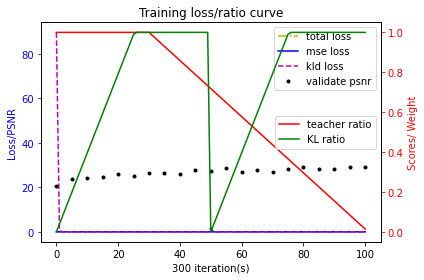

In [5]:
plot_log("./batch20_cyclical.txt")


## plot the ground and predict image

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png']


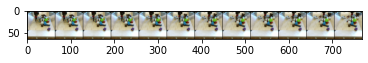

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png']


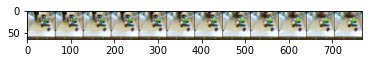

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt


for fold in ["./img/GT", "./img/Pred"]:
    folder_path = fold
    image_files = os.listdir(folder_path)
    image_files.sort()
    image_files = sorted(image_files, key=lambda x: int(os.path.splitext(x)[0]))  # 將檔案名稱按照數字大小排序
    images = [Image.open(os.path.join(folder_path, img_file)) for img_file in image_files[:12]]
    print(image_files)

    total_width = sum([img.width for img in images])
    max_height = max([img.height for img in images])


    concatenated_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for img in images:
        concatenated_image.paste(img, (x_offset, 0))
        x_offset += img.width

    concatenated_image.save(f'{fold[6:]}_image.jpg')
    # show the two image in the jupyter block
    plt.imshow(concatenated_image)
    plt.show()
    

## plot the gif

In [ ]:

import os
from PIL import Image

def concat_gifs_horizontally(gif_paths, output_path):
    gif_images = [Image.open(gif_path) for gif_path in gif_paths]
    frames = []
    
    while True:
        try:
            current_frames = [img.resize((img.width, img.height), Image.Resampling.LANCZOS) for img in gif_images]
            max_height = max(img.height for img in current_frames)

            total_width = sum(img.width for img in current_frames)
            combined_image = Image.new("RGBA", (total_width, max_height))

            x_offset = 0
            for img in current_frames:
                combined_image.paste(img, (x_offset, 0))
                x_offset += img.width

            frames.append(combined_image)

            for img in gif_images:
                img.seek(img.tell() + 1)
        except EOFError:
            break

    frames[0].save(output_path, save_all=True, append_images=frames[1:], optimize=False, duration=300, loop=0)


for i in range(6):
    image_folder = f'./img/{i}/'
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png') or f.endswith('.jpg')])
    images = [Image.open(os.path.join(image_folder, image_file)) for image_file in image_files]

    gif_path = f'./gif{i+1}.gif'
    images[0].save(gif_path, save_all=True, append_images=images[1:], optimize=False, duration=300, loop=0)

gif_paths = ["gif1.gif", "gif2.gif", "gif3.gif", "gif4.gif", "gif5.gif", "gif6.gif"]
output_path = "combined_gif.gif"
concat_gifs_horizontally(gif_paths, output_path)
